**Q-3. Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data.
Dataset This is the Dataset You can use this dataset for this question.**


# Setting Data

## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
from zipfile import ZipFile
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.linear_model import SGDClassifier
import logging
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
% matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

UsageError: Line magic function `%` not found.


### Open file

In [8]:
filename = "/kaggle/input/news-category-dataset/News_Category_Dataset_v2.json"
df = pd.read_json(filename,lines = True)

### First look at data

In [9]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [10]:
#Data types
df.dtypes

category                     object
headline                     object
authors                      object
link                         object
short_description            object
date                 datetime64[ns]
dtype: object

In [11]:
df.describe()

,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://www.theda...,,2013-01-17 00:00:00
freq,32739,90,36620,2,19712,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


For this project, we need two columns — "Headline” and "Short Description". They are going to be the 'input' for the model, which will predict the category of the text.

Input: 'headline', 'headline

Output: 'category'

### Dropping extra columns

I will drop 'authors', 'link' and 'date' columns to clean the visualization

In [12]:
df.drop(["authors","link","date"], axis=1, inplace = True)
df.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


In [13]:
df.describe()

,category,headline,short_description
count,200853,200853,200853
unique,41,199344,178353
top,POLITICS,Sunday Roundup,
freq,32739,90,19712


## Counting number of articles vs type

In [14]:
categories_count=df['category'].value_counts()
categories_count.to_frame()

,category
POLITICS,32739
WELLNESS,17827
ENTERTAINMENT,16058
TRAVEL,9887
STYLE & BEAUTY,9649
PARENTING,8677
HEALTHY LIVING,6694
QUEER VOICES,6314
FOOD & DRINK,6226
BUSINESS,5937


There are two categories with basically are the same: Worldpost and The Worldpost. We should consider them the same category.

In [15]:
categories_count['WORLDPOST']

2579

In [16]:
categories_count['THE WORLDPOST']

3664

In [17]:
categories_count['WORLDPOST']  + categories_count['THE WORLDPOST']

6243

Setting `"WORLDPOST"` and `"THE WORLDPOST"` as the same category

In [18]:
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [19]:
categories_count=df['category'].value_counts()
categories_count.to_frame()

,category
POLITICS,32739
WELLNESS,17827
ENTERTAINMENT,16058
TRAVEL,9887
STYLE & BEAUTY,9649
PARENTING,8677
HEALTHY LIVING,6694
QUEER VOICES,6314
WORLDPOST,6243
FOOD & DRINK,6226


In [20]:
categories_count['WORLDPOST']

6243

## Plotting

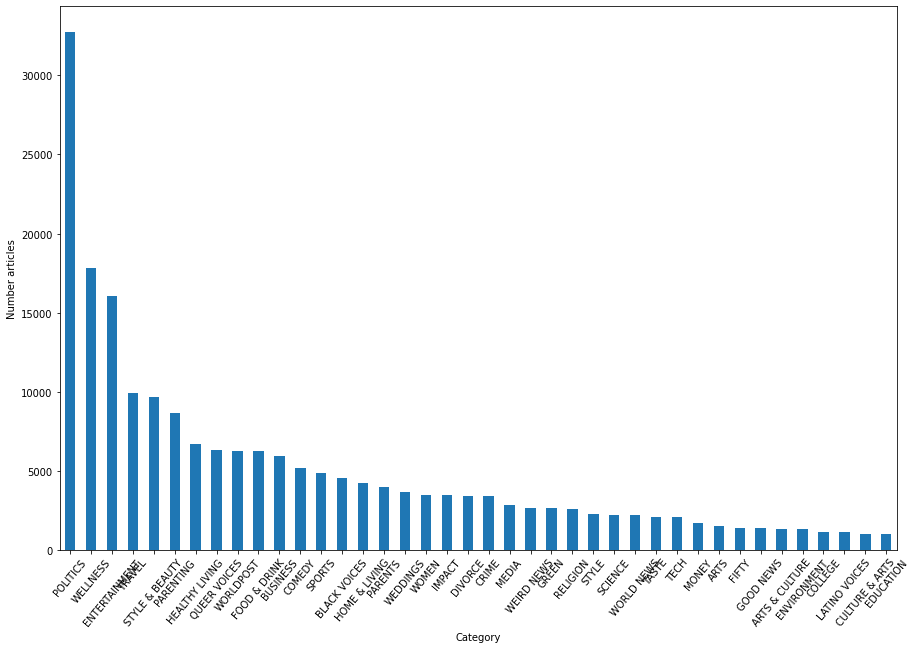

In [21]:
plt.figure(figsize=(15,10))
categories_count.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Category")
plt.ylabel("Number articles")
plt.show()

## Fusing 'headline' and 'short_description'

Since we need both information on 'headline' and 'short_description', we are going to fuse these columns

In [22]:
df['text'] = df['headline'] + " " + df['short_description']

In [23]:
df.head()

,category,headline,short_description,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


Add a column encoding "Category" as an integer because categorical variables are often better represented by integers than strings. We will create a table with three columns: 'category', 'category_id' and 'text'.

In [24]:
col = ['category','text']
df_clean = df[col]

from io import StringIO

df = df_clean[pd.notnull(df_clean['text'])]
df.columns = ['category', 'text']
df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head()

,category,text,category_id
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,1


## Categories and its codes

In [25]:
df2 = df[['category','category_id']]
codes = df2.drop_duplicates(keep = 'last', inplace=False).sort_values(by = 'category_id')
codes

,category,category_id
199539,CRIME,0
200839,ENTERTAINMENT,1
29757,WORLD NEWS,2
200827,IMPACT,3
124983,POLITICS,4
124863,WEIRD NEWS,5
200752,BLACK VOICES,6
124984,WOMEN,7
200814,COMEDY,8
200824,QUEER VOICES,9


# Data Pre-Processing

In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Function to clean, tokenize, remove stop word, and not alphanumeric from data

In [27]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say']
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)    
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [28]:
def Format_data(df): 
    # iterate over all the rows 
    for i in range(df.shape[0]): 
  
        # reassign the values to the product column 
        # we first strip the whitespaces using strip() function 
        # then we capitalize the first letter using capitalize() function 
        df.iat[i, 1]= clean_txt(df.iat[i, 1])


In [29]:
vectorizer = TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = None, preprocessor=clean_txt)
vectorizer.fit(df.category)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.2, max_features=None,
                min_df=3, ngram_range=(1, 1), norm='l2',
                preprocessor=<function clean_txt at 0x7fecb281be18>,
                smooth_idf=1, stop_words=None, strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

# Frequency of the words in each category
### A statistical analysis

Let's see what are the 10 most frequent words in each category

In [30]:

def create_tf_matrix(category):
    return vectorizer.transform(df[df.category == category].text)

def create_term_freq(matrix, cat):
  category_words = matrix.sum(axis=0)
  category_words_freq = [(word, category_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  return pd.DataFrame(list(sorted(category_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms', cat])

for cat in df.category.unique():
  print("Top 10 terms for: ", cat)
  df_right = create_term_freq(create_tf_matrix(cat), cat).head(10)
  print(df_right)
  print("###############")
  if cat != 'CRIME':
    df_top5_words = df_top5_words.merge(df_right, how='outer')
  else:
    df_top5_words = df_right.copy()
  print(df_top5_words.shape )

  

Top 10 terms for:  CRIME
     Terms       CRIME
0     home  122.780746
1    crime   61.279350
2    black   54.603386
3    drink   50.149849
4     live   47.139003
5   parent   42.693406
6    women   42.479414
7  college   26.158697
8     good   24.768079
9    money   22.500460
###############
(10, 2)
Top 10 terms for:  ENTERTAINMENT
    Terms  ENTERTAINMENT
0    live     356.901616
1    good     336.142522
2   world     331.985059
3   women     239.054035
4   black     204.679678
5    home     153.132509
6  comedy     145.462310
7   media     114.164769
8   voice     109.243520
9  parent      79.957844
###############
(14, 3)
Top 10 terms for:  WORLD NEWS
      Terms  WORLD NEWS
0     world  107.477013
1     women   57.656851
2     media   30.497552
3      live   27.490777
4      home   26.794834
5      good   15.763163
6     black   13.506478
7    travel   12.679764
8      food   12.658104
9  politics   10.013183
###############
(17, 4)
Top 10 terms for:  IMPACT
       Terms      IMPA

      Terms   WORLDPOST
0     world  386.262243
1      live  129.162228
2     women  128.684004
3     media   90.227952
4      home   90.140254
5      good   41.103524
6  politics   30.980908
7     voice   28.810459
8    travel   26.504742
9  business   25.739803
###############
(35, 28)
Top 10 terms for:  GOOD NEWS
     Terms  GOOD NEWS
0     home  66.795463
1    world  52.287612
2     live  47.401297
3     good  36.989055
4     food  21.952309
5    money  18.645634
6  college  13.307826
7   parent   8.693309
8    style   6.000000
9    media   5.820593
###############
(35, 29)
Top 10 terms for:  FIFTY
     Terms       FIFTY
0     live  106.491242
1    women   63.274707
2     good   62.535528
3    world   55.357256
4     home   52.630024
5   parent   39.731793
6  college   20.532550
7  healthy   18.100826
8   beauty   12.996088
9   travel   12.023648
###############
(35, 30)
Top 10 terms for:  ARTS
     Terms       ARTS
0    world  97.980348
1     live  58.421848
2     good  30.569801


In [31]:
df_top5_words.fillna(0, inplace=True )
df_top5_words.set_index('Terms', inplace=True)
df_top5_words.shape

(37, 40)

In [33]:
!pip install textacy

     |████████████████████████████████| 206 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 48.5 MB/s eta 0:00:01
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=81352 sha256=aeb005c6f61b1a321e173bbea1f40789d7b02602dba736e3efbfb40e18f052d9
  Stored in directory: /root/.cache/pip/wheels/3b/de/5e/9a80586358562caf9f6b3913b998e45508b5748bce9a45d419
Successfully built jellyfish


In [34]:
from textacy.viz.termite import draw_termite_plot

In [35]:
df = df_top5_words.copy()
df_norm = (df) / (df.max() - df.min())

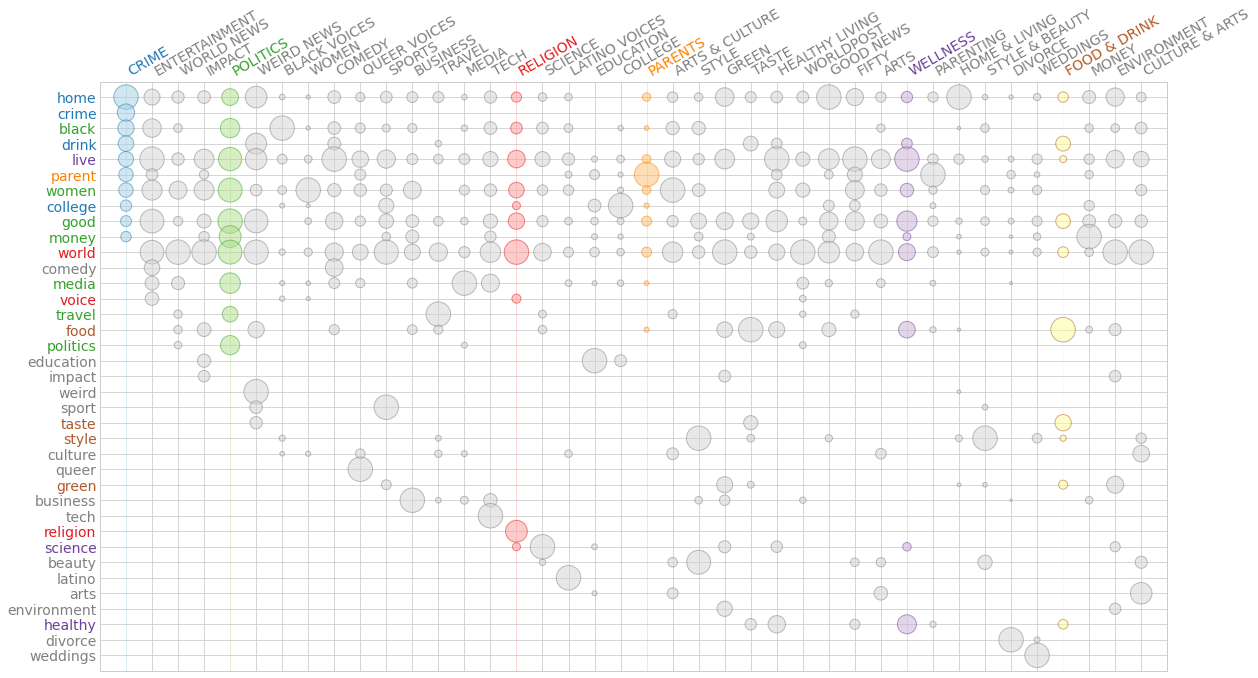

In [37]:
draw_termite_plot(np.array(df_norm.values),df_top5_words.columns,df_top5_words.index, highlight_cols=[0, 4,15,20,30,36] )

# Training the model

In [40]:
filename = "/kaggle/input/news-category-dataset/News_Category_Dataset_v2.json"
df = pd.read_json(filename,lines = True)

In [41]:
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [42]:
df['text'] = df['headline'] + " " + df['short_description']

In [43]:
col = ['category','text']
df_clean = df[col]

from io import StringIO

df = df_clean[pd.notnull(df_clean['text'])]
df.columns = ['category', 'text']
df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head()

,category,text,category_id
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,1


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
features.shape

(200853, 87413)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

## Predictions

In [46]:
print(clf.predict(count_vect.transform(["Looking For a New Watch? 50 Shows Starring Awesome Ladies You Can Stream Right Now"])))

['ENTERTAINMENT']


In [47]:
print(clf.predict(count_vect.transform(["Miley Cyrus shaves Cody Simpson's head, plus more news"])))

['ENTERTAINMENT']
